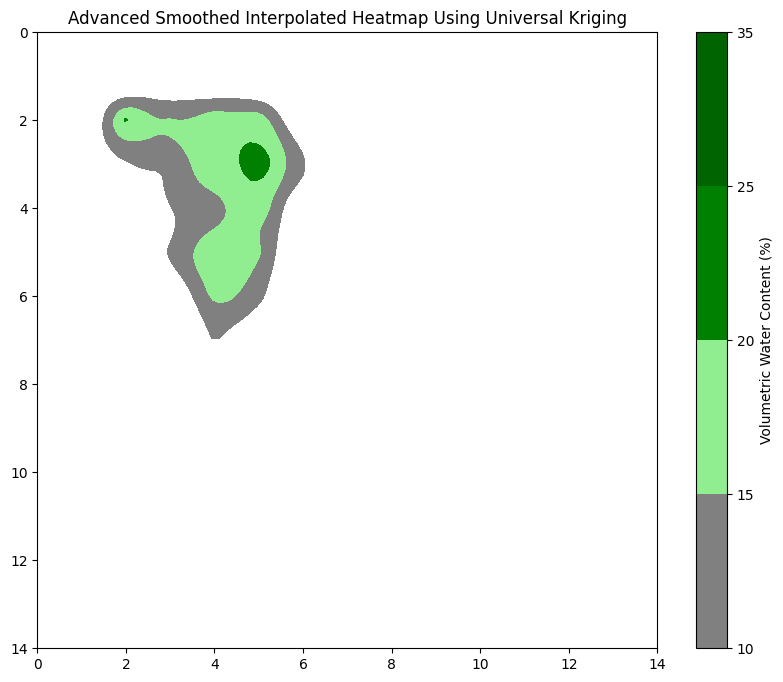

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.uk import UniversalKriging
from matplotlib.colors import ListedColormap, BoundaryNorm

data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Target grid for interpolation
xi = np.linspace(0, data.shape[1]-1, 100)
yi = np.linspace(0, data.shape[0]-1, 100)
XI, YI = np.meshgrid(xi, yi)

# Setup Universal Kriging using Gaussian variogram model
UK = UniversalKriging(
    X.flatten(),
    Y.flatten(),
    data.flatten(),
    variogram_model='spherical',  # This model provides smoothest results
    drift_terms=['regional_linear']
)

# Perform kriging
zi, ss = UK.execute('grid', xi, yi)

# Define color map
colors = ["grey", "lightgreen", "green", "darkgreen"]
cmap = ListedColormap(colors)
norm = BoundaryNorm([10, 15, 20, 25, 35], len(colors))

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=[10, 15, 20, 25, 35], cmap=cmap, norm=norm)
plt.colorbar(contourf, label='Volumetric Water Content (%)')
plt.title("Advanced Smoothed Interpolated Heatmap Using Universal Kriging")
plt.gca().invert_yaxis()
plt.show()


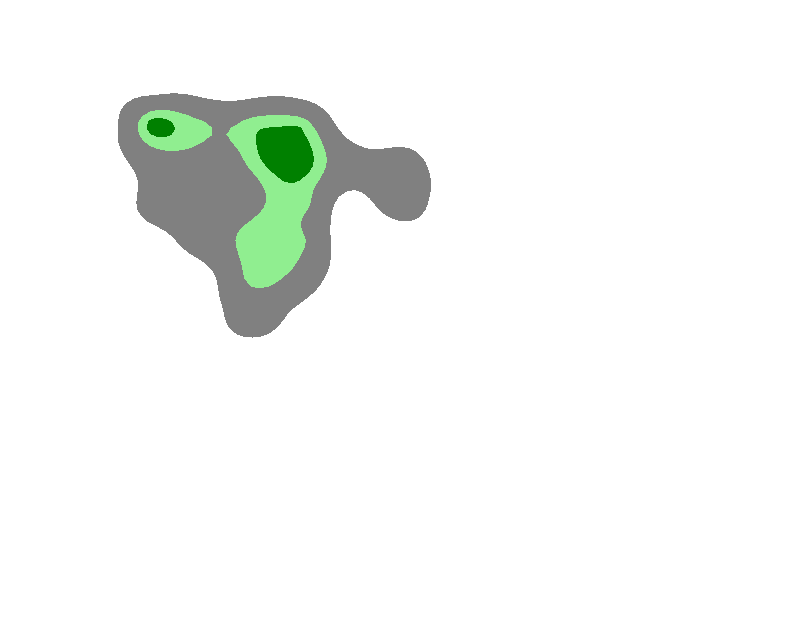

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from matplotlib.colors import ListedColormap, BoundaryNorm

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Extend the data boundary by repeating edge values (simple method to reduce edge effects)
data_padded = np.pad(data, 1, mode='edge')
# data_padded =0
# New coordinates including padding
x_padded = np.arange(-1, data.shape[1]+1)
y_padded = np.arange(-1, data.shape[0]+1)
X_padded, Y_padded = np.meshgrid(x_padded, y_padded)

# Create a finer mesh for interpolation
xi = np.linspace(x_padded.min(), x_padded.max(), 100)
yi = np.linspace(y_padded.min(), y_padded.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Perform kriging
OK = OrdinaryKriging(
    X_padded.flatten(),
    Y_padded.flatten(),
    data_padded.flatten(),
    variogram_model='spherical',  # Adjusted model
    # variogram_parameters={'sill': 30, 'range': 5, 'nugget': 0}  # Hypothetical parameters
)
zi, ss = OK.execute('grid', xi, yi)

# Define colors for the heatmap
colors = ["grey", "lightgreen", "green", "darkgreen"]  # Using only green colors
cmap = ListedColormap(colors)
norm = BoundaryNorm([5, 15, 20, 25, 35], len(colors))  # Levels adjusted to green

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(XI, YI, zi, levels=[5, 15, 20, 25, 35], cmap=cmap, norm=norm)  # Adjusted levels to show only greens
plt.axis('off')  # Hide the axes
plt.gca().invert_yaxis() # Make the plot cover the whole figure

# Save the plot as PNG with only the green part
plt.savefig('green_only_heatmap.png', bbox_inches='tight', pad_inches=0, transparent=True)
# plt.close()  # Close the plot to free up memory


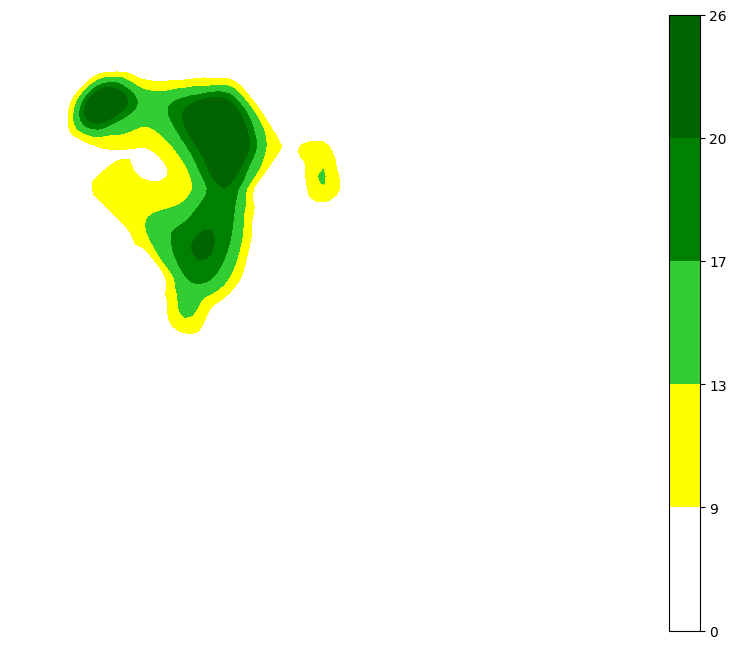

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap, BoundaryNorm

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Define colors for the heatmap
colors = ["white","yellow", "limegreen", "green", "darkgreen"]  # Using only green colors
cmap = ListedColormap(colors)
norm = BoundaryNorm([0, 9, 13, 17, 20, 26], len(colors))  # Adjust levels including zero

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(XI, YI, zi, levels=[0, 9, 13, 17, 20, 26], cmap=cmap, norm=norm)
plt.colorbar()  # Optionally add a color bar
plt.axis('off')
plt.gca().invert_yaxis()

# Save the plot as PNG
plt.savefig('simple_interpolated_heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [2]:
import os

def delete_images_in_directory(directory):
    # List all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is an image
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.webp')):
            # Construct the full path to the file
            file_path = os.path.join(directory, filename)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted {file_path}")

# Specify the directory containing the images
image_directory = '/root'

# Call the function to delete all images in the specified directory
delete_images_in_directory(image_directory)


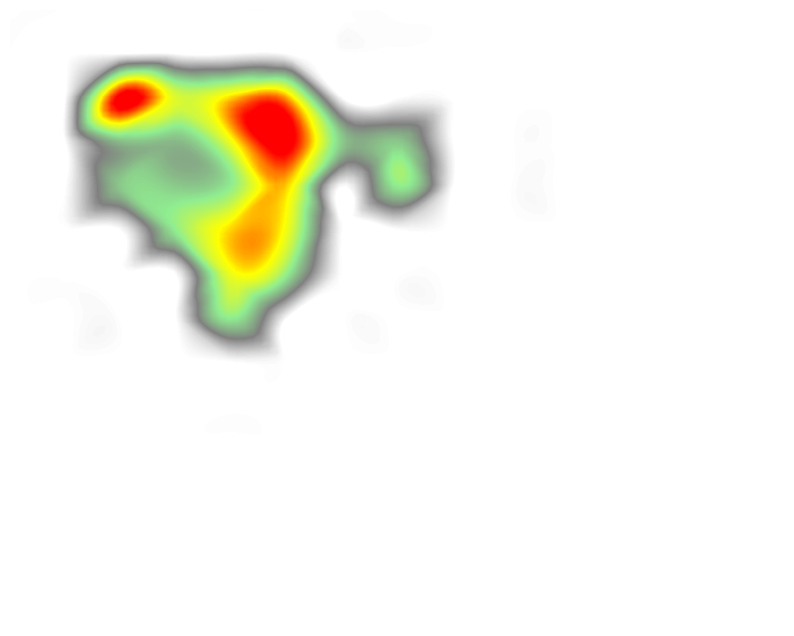

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Set a custom range to ensure extreme values are colored red
vmin, vmax = 0, 30  # Set vmax less than the maximum expected interpolated value
norm = Normalize(vmin=vmin, vmax=vmax)

# Custom colormap that ends with red for the highest values
colors = [ "white","grey","lightgreen", "yellow", "red", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
# plt.colorbar(contourf)
 # Optionally add a color bar
plt.axis('off')
plt.gca().invert_yaxis()

# Save the plot as PNG
plt.savefig('adjusted_heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


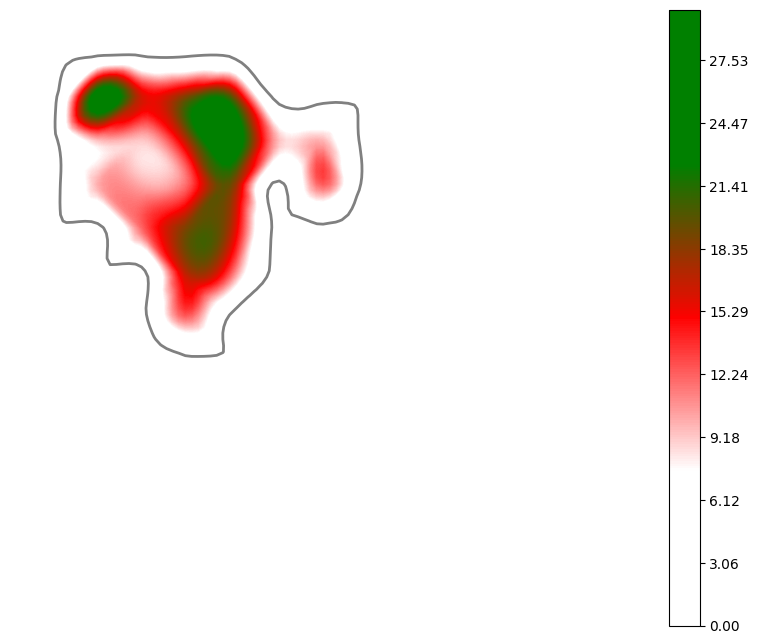

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Set a custom range to ensure extreme values are colored red
vmin, vmax = 0, 30
norm = Normalize(vmin=vmin, vmax=vmax)

# Custom colormap that ends with red for the highest values
colors = ["white", "white", "red", "green", "green"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
plt.colorbar(contourf)

# Adding grey polyline for outer boundary of nonzero values
plt.contour(XI, YI, zi, levels=[1], colors='grey', linewidths=2)  # Outline at level 1 for clarity

plt.axis('off')
plt.gca().invert_yaxis()

# Save the plot as PNG
plt.savefig('adjusted_heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


/tmp/ipykernel_463612/2740249077.py:46: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


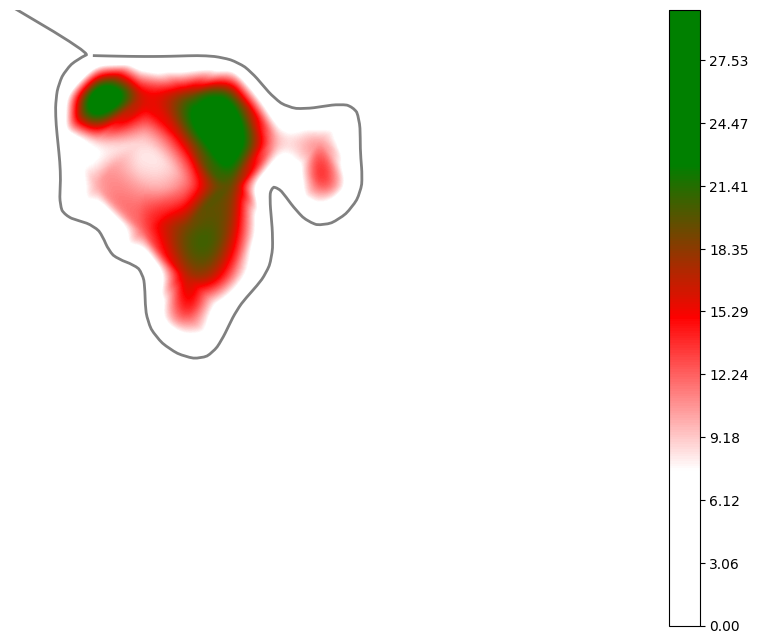

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
# data = np.asarray([
#     # Your data here...
# ])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 0, 30
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["white", "white", "red", "green", "green"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
plt.colorbar(contourf)

# Extract contour lines at level 1 and apply spline smoothing
contours = plt.contour(XI, YI, zi, levels=[1], colors='none')  # Change colors to 'none' to hide original contours

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=3)
    new_points = splev(np.linspace(0, 1, 200), tck)
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

plt.axis('off')
plt.gca().invert_yaxis()
plt.savefig('adjusted_heatmap_smooth.png', bbox_inches='tight', pad_inches=0)
plt.show()


/tmp/ipykernel_470008/3668511974.py:46: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


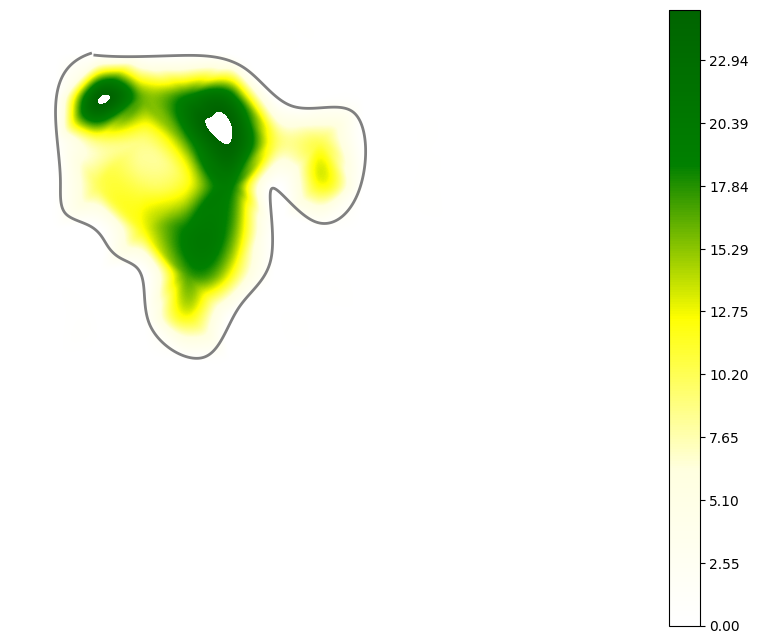

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
# data = np.asarray([
#     # Your data here...
# ])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 0, 25
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["white", "lightyellow", "yellow", "green", "darkgreen"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
plt.colorbar(contourf)

# Extract contour lines at level 1 and apply spline smoothing
contours = plt.contour(XI, YI, zi, levels=[1], colors='none')  # Change colors to 'none' to hide original contours

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)  # Increased smoothing factor
    new_points = splev(np.linspace(0, 1, 1000), tck)  # Increased number of evaluation points
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

plt.axis('off')
plt.gca().invert_yaxis()
plt.savefig('adjusted_heatmap_ultra_smooth.png', bbox_inches='tight', pad_inches=0)
plt.show()


/tmp/ipykernel_710780/3325322795.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


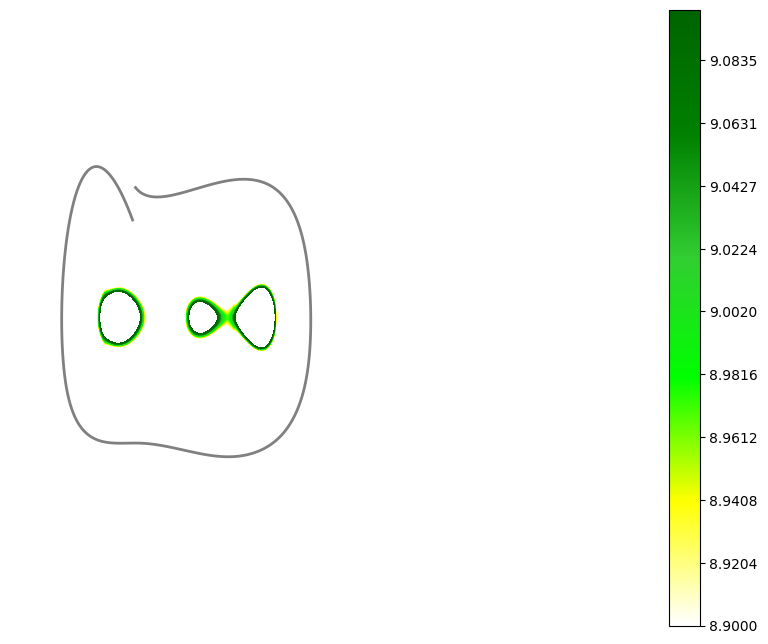

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
data = np.asarray([
  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 8.9, 9.1
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["white","yellow","lime","limegreen","green","darkgreen"]  # Adjusted colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_under('white')
# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
plt.colorbar(contourf)

# Extract contour lines at level 1 and apply spline smoothing
contours = plt.contour(XI, YI, zi, levels=[1], colors='none')  # Change colors to 'none' to hide original contours

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)  # Increased smoothing factor
    new_points = splev(np.linspace(0, 1, 1000), tck)  # Increased number of evaluation points
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

plt.axis('off')
plt.gca().invert_yaxis()
plt.savefig('adjusted_heatmap_ultra_smooth.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 7, 30
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["yellow", "lime" ,"limegreen", "green","darkgreen"]  # Adjusted colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm)
plt.colorbar(contourf)

# Extract contour lines at level 1 and apply spline smoothing
# contours = plt.contour(XI, YI, zi, levels=[1], colors='none')  # Change colors to 'none' to hide original contours
contours = plt.contour(XI, YI, zi, levels=np.linspace(vmin, vmax, 60), colors='none')

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)  # Increased smoothing factor
    new_points = splev(np.linspace(0, 1, 1000), tck)  # Increased number of evaluation points
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

plt.axis('off')
plt.gca().invert_yaxis()
plt.savefig('adjusted_heatmap_ultra_smooth.png', bbox_inches='tight', pad_inches=0)
plt.show()


AttributeError: type object 'ListedColormap' has no attribute 'from_list'

/tmp/ipykernel_710780/3752706414.py:47: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


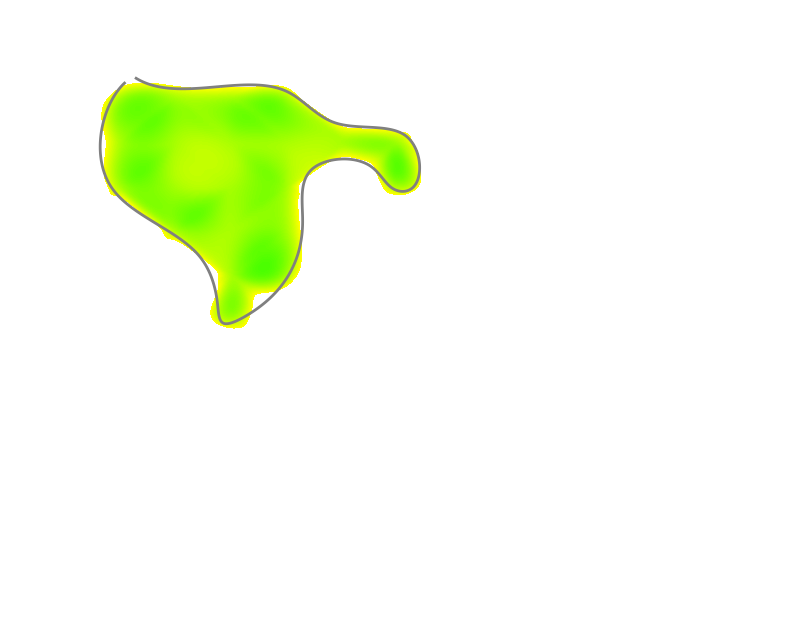

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
data = np.asarray([
   [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, 9, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1], [-1, -1, 9, 9, 9, 9, -1, 9, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 7, 30
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["yellow", "lime", "limegreen", "green", "darkgreen"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_under('white')  # Set under value color to yellow

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm, extend='both')
# plt.colorbar(contourf)

# Extract contour lines at specified levels and apply spline smoothing
contours = plt.contour(XI, YI, zi, levels=np.linspace(vmin, vmax, 60), colors='none')

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)
    new_points = splev(np.linspace(0, 1, 1000), tck)
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

plt.axis('off')
plt.gca().invert_yaxis()
plt.savefig('adjusted_heatmap_ulan_smooth.png', bbox_inches='tight',  pad_inches=0)
plt.show()


/tmp/ipykernel_71159/2315681315.py:35: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_spline = interp2d(x, y, data, kind='cubic')  # Can change kind to 'linear', 'cubic', etc.
/tmp/ipykernel_71159/2315681315.py:36: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For 

9
8


/tmp/ipykernel_71159/2315681315.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


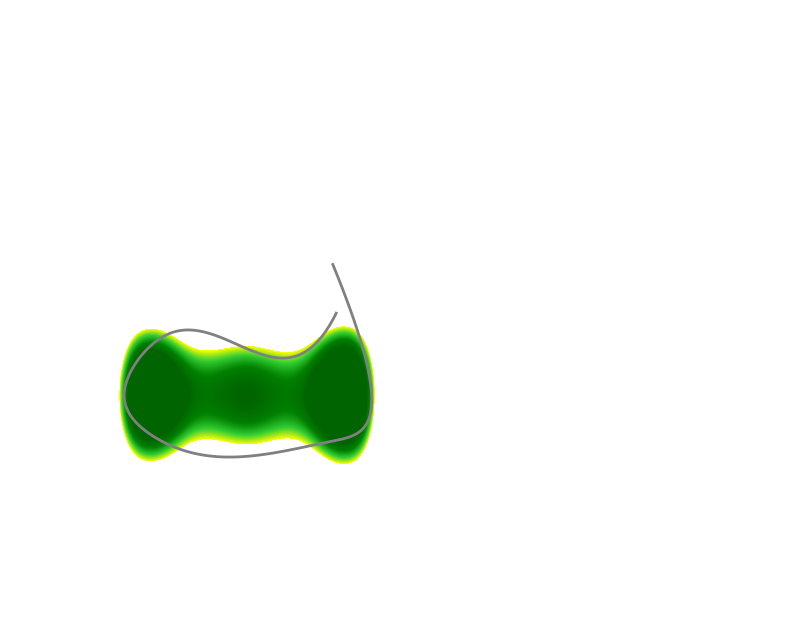

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev
from scipy.interpolate import Rbf, interp2d

#Sample data
data = np.asarray([
  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)

zi = griddata(points, values, (XI, YI), method='linear')


interp_spline = interp2d(x, y, data, kind='cubic')  # Can change kind to 'linear', 'cubic', etc.
zi = interp_spline(xi, yi)


if -1 in data.flatten():
    values = data.flatten()
    values_greater_than_zero = values[values > 0]
    vmin = values_greater_than_zero.min()
    vmax = data.max()
    norm = None
else:
    values = data.flatten()
    if values.min() == 0:
        non_zero_values = values[values != 0]
        if non_zero_values.size > 0:
            vmin = non_zero_values.min() - 2
            if vmin < 0:
                vmin = values.min() + 1
        else:
            vmin = 0  # Fallback to zero if all values are zero
    else:
        vmin = values.min()
    vmax = values.max()
    norm = Normalize(vmin=vmin, vmax=vmax)


if vmin == vmax:
    vmin = vmax -1

print(vmax)
print(vmin)
colors = ["yellow", "limegreen", "green", "darkgreen"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

cmap.set_under('white')  

nonzero_indices = np.nonzero(data)
min_x, max_x = x[nonzero_indices[1]].min(), x[nonzero_indices[1]].max()
min_y, max_y = y[nonzero_indices[0]].min(), y[nonzero_indices[0]].max()

padding = 3  # Add padding to each side
min_x, max_x = max(min_x - padding, 0), min(max_x + padding, data.shape[1]-1)
min_y, max_y = max(min_y - padding, 0), min(max_y + padding, data.shape[0]-1)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm, extend='both')

contours = plt.contour(XI, YI, zi, levels=np.linspace(vmin, vmax, 60), colors='none')

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)
    new_points = splev(np.linspace(0, 1, 1000), tck)
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)
# Adjust plot limits to focus on significant data automatically
plt.xlim(xi[max(int(min_x * 499 / (x.max()+1)), 0)], xi[min(int(max_x * 499 / (x.max()+1)), 499)])
plt.ylim(yi[max(int(min_y * 499 / (y.max()+1)), 0)], yi[min(int(max_y * 499 / (y.max()+1)), 499)])

plt.axis('off')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipykernel_326606/3950420333.py:60: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_spline = interp2d(x, y, data, kind='linear')  # Can change kind to 'linear', 'cubic', etc.
/tmp/ipykernel_326606/3950420333.py:61: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
F

8
11


/tmp/ipykernel_326606/3950420333.py:121: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


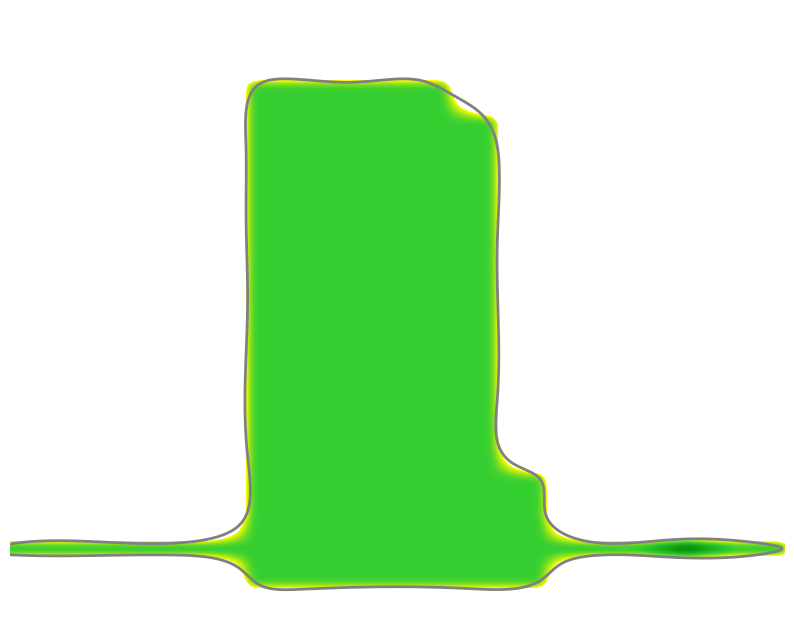

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev
from scipy.interpolate import Rbf, interp2d
from scipy.ndimage import gaussian_filter

# Sample data
data = np.asarray([
   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,0,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,0,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,9,0,0,0,0,0],[0,0,0,0,0,9,9,9,9,9,9,9,0,0,0,0,0],[10,10,10,10,10,9,9,9,9,9,9,9,10,10,11,10,10],[0,0,0,0,0,9,9,9,9,9,9,9,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])


new_row = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# new_row = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

# Insert the new row at the top
data = np.insert(data, 0, new_row, axis=0)
data = np.insert(data, 0, new_row, axis=0)
# Append the new row
data = np.vstack([data, new_row])
data = np.vstack([data, new_row])
data = np.vstack([data, new_row])
new_column = [0] * data.shape[0]
new_column = [0] * data.shape[0]
data = np.column_stack([data, new_column])
# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)
 # Sample data

# Apply Savitzky-Golay filter to smooth data
 # Smooth each column


# Mask to identify non-zero data points
non_zero_mask = data.flatten() > 0

# Filter points and values where data is non-zero
filtered_points = points[non_zero_mask]
filtered_values = values[non_zero_mask]

# Interpolate using filtered data
# zi = griddata(points, values, (XI, YI), method='linear')


interp_spline = interp2d(x, y, data, kind='linear')  # Can change kind to 'linear', 'cubic', etc.
zi = interp_spline(xi, yi)
zi = gaussian_filter(zi, sigma=3)


values = data.flatten()
if values.min() == 0:
    non_zero_values = values[values!= 0]
    if non_zero_values.size > 0:
        vmin = non_zero_values.min() - 1
        
        if vmin < 0:
            vmin = values.min() + 1
    else:
            vmin = 0  # Fallback to zero if all values are zero

    

vmax = values.max()

non_zero_values = data[data > 0]
  # or any other percentile that suits your need
# vmin = 1
vmin = non_zero_values.min() - 1
differences = np.diff(data)
is_increasing = np.all(differences > 0)
is_decreasing = np.all(differences < 0)

# Calculate vmin based on the data trend
if is_increasing or is_decreasing:
    vmin = vmin - 3 * range
# range = vmax - vmin
# if range >= 2:
#    vmin = vmin - 2 * range  # Reduce vmin by 10% of the range
#    vmin = max(vmin, 1)

print(vmin)
print(vmax)
norm = Normalize(vmin=vmin, vmax=vmax)

# Divide colors into quad
quad_colors = ["yellow", "limegreen", "green", "darkgreen"]
quad_cmap = LinearSegmentedColormap.from_list("quad_cmap", quad_colors, N=256)
quad_cmap.set_under('white') 

            
nonzero_indices = np.nonzero(data)
min_x, max_x = x[nonzero_indices[1]].min(), x[nonzero_indices[1]].max()
min_y, max_y = y[nonzero_indices[0]].min(), y[nonzero_indices[0]].max()

padding = 2 # Add padding to each side
min_x, max_x = max(min_x - padding, 0), min(max_x + padding, data.shape[1]-1)
min_y, max_y = max(min_y - padding, 0), min(max_y + padding, data.shape[0]-1)

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=quad_cmap, extend='both')

contours = plt.contour(XI, YI, zi, levels=np.linspace(vmin, vmax, 60), colors='none')

# Smooth the contour lines using spline
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)
    new_points = splev(np.linspace(0, 1, 1000), tck)
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)
# Adjust plot limits to focus on significant data automatically
plt.xlim(xi[max(int(min_x * 499 / (x.max()+1)), 0)], xi[min(int(max_x * 499 / (x.max()+1)), 499)])
plt.ylim(yi[max(int(min_y * 499 / (y.max()+1)), 0)], yi[min(int(max_y * 499 / (y.max()+1)), 499)])

plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

In [91]:
import numpy as np

data = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 12, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Calculate the maximum value for each significant block
def get_block_maximums(data):
    max_values = []
    current_max = 0
    for row in data:
        if np.max(row) > 0:
            new_max = np.max(row[np.nonzero(row)])
            if new_max != current_max:
                max_values.append(new_max)
                current_max = new_max  # corrected from new_id to new_max

    return max_values

block_maxes = get_block_maximums(data)
is_increasing = all(x < y for x, y in zip(block_maxes, block_maxes[1:]))
print("Block maxima:", block_maxes)
print("Is the data strictly increasing across blocks? ", is_increasing)


Block maxima: [9, 12, 19, 12]
Is the data strictly increasing across blocks?  False


/tmp/ipykernel_706154/3530588885.py:58: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for contour_path in contours.collections[0].get_paths():


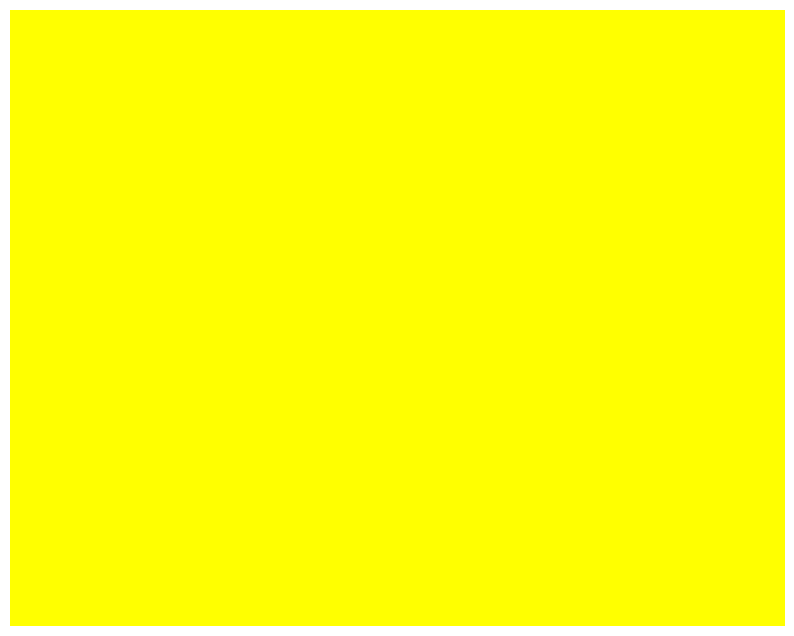

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
data = np.asarray([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 25, 16, 19, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 9, 9, 17, 25, 10, 10, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 10, 10, 12, 19, 0, 12, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 12, 19, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 17, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

# Flatten the arrays
points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)

# Interpolate using griddata
zi = griddata(points, values, (XI, YI), method='cubic')

# Custom colormap and normalization
vmin, vmax = 7, 30
norm = Normalize(vmin=vmin, vmax=vmax)
colors = ["yellow", "lime", "limegreen", "green", "darkgreen"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_under('yellow')  # Set under value color to yellow

# Plotting
plt.figure(figsize=(10, 8))
contourf = plt.contourf(XI, YI, zi, levels=np.linspace(vmin, vmax, 256), cmap=cmap, norm=norm, extend='both')

# Extract contour lines at specified levels and apply spline smoothing
contours = plt.contour(XI, YI, zi, levels=np.linspace(vmin, vmax, 60), colors='none')
for contour_path in contours.collections[0].get_paths():
    vertices = contour_path.vertices
    tck, u = splprep([vertices[:, 0], vertices[:, 1]], s=5)
    new_points = splev(np.linspace(0, 1, 1000), tck)
    
    smooth_contour = Path(list(zip(new_points[0], new_points[1])), [Path.MOVETO] + [Path.CURVE4] * (len(new_points[0]) - 1))
    patch = PathPatch(smooth_contour, facecolor='none', edgecolor='grey', linewidth=2)
    plt.gca().add_patch(patch)

# Adjust plot limits based on significant data locations with added padding
padding = 3
x_indices = np.where(np.any(data > 0, axis=0))[0]
y_indices = np.where(np.any(data > 0, axis=1))[0]
xlims = [max(x_indices[0] - padding, 0), min(x_indices[-1] + padding, data.shape[1])]
ylims = [max(y_indices[0] - padding, 0), min(y_indices[-1] + padding, data.shape[0])]
plt.xlim(xi[xlims[0]:xlims[1]].min(), xi[xlims[0]:xlims[1]].max())
plt.ylim(yi[ylims[0]:ylims[1]].min(), yi[ylims[0]:ylims[1]].max())

plt.axis('off')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
%cd root

/root


/root/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.interpolate import splprep, splev

# Sample data
data = np.asarray([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Coordinates of data points
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

points = np.array([X.flatten(), Y.flatten()]).T
values = data.flatten()

# Create a finer mesh for interpolation
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
XI, YI = np.meshgrid(xi, yi)

zi = griddata(points, values, (XI, YI), method='cubic')


if 0 in data.flatten():
    values = data.flatten()
    values_greater_than_zero = values[values > 0]
    vmin = values_greater_than_zero.min()
    vmax = data.max()
    norm = None
else:
    values = data.flatten()
    if

TypeError: cannot unpack non-iterable Figure object

<Figure size 1000x800 with 0 Axes>

In [4]:
%cd root

/root


/root/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
np

NameError: name 'np' is not defined

In [1]:
%cd root

/root


/root/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
